In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Loading files in pandas dataframes**

In [2]:
sale_train = pd.read_csv("https://media.githubusercontent.com/media/ducNguyenFSBmse/ducNguyenFSBmse/Data/sales_train_validation.csv")
calendar = pd.read_csv("https://media.githubusercontent.com/media/ducNguyenFSBmse/ducNguyenFSBmse/Data/calendar.csv")
sell_prices = pd.read_csv("https://media.githubusercontent.com/media/ducNguyenFSBmse/ducNguyenFSBmse/Data/sell_prices.csv")

In [3]:
import datetime
current_label_date = datetime.date(2011,1,29)
for c in ((sale_train.columns)[6:]):
    sale_train.rename(columns={c:current_label_date},inplace=True)
    current_label_date = current_label_date + datetime.timedelta(days=1)

In [4]:
#Review data set
sale_train.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


In [5]:
calendar.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


In [6]:
sell_prices.head(3)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26


# **Sales of first 5 items as time series**

In [7]:
total_sale_by_id = sale_train.groupby('item_id')[(sale_train.columns)[6:]].sum()

In [8]:
first_5_sale = total_sale_by_id.head(5)
first_5_sale

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
item_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1_001,6,6,4,6,7,18,10,4,11,10,...,4,4,30,7,5,3,6,2,16,6
FOODS_1_002,4,5,7,4,3,4,1,7,2,4,...,5,9,4,1,3,5,5,3,3,1
FOODS_1_003,14,8,3,6,3,8,13,10,11,6,...,7,3,5,6,3,4,4,3,11,5
FOODS_1_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOODS_1_005,34,32,13,20,10,21,18,20,25,41,...,16,14,14,18,18,27,12,15,38,9


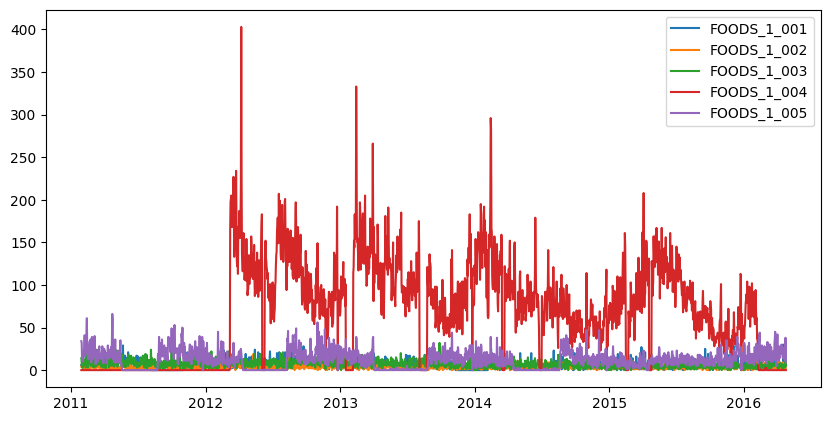

In [9]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for index in range(5):
    plt.plot(first_5_sale.iloc[index,:],label=first_5_sale.index[index])
    plt.legend(loc='best')
plt.show()

# **Total sales as time series**

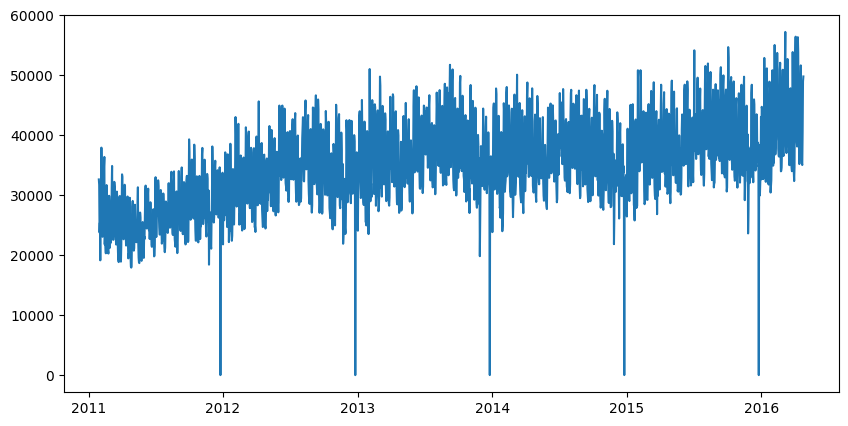

In [10]:
plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
(total_sale_by_id.sum()).plot()
plt.show()

# **Monthly sales in different cities**

In [11]:
monthly_sale = sale_train.groupby(sale_train.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
monthly_sale

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2016-01,2016-02,2016-03,2016-04,cat_id,dept_id,id,item_id,state_id,store_id
0,0,0,0,0,0,0,0,0,0,0,...,24,29,29,26,HOBBIES,HOBBIES_1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,CA,CA_1
1,0,0,0,0,0,3,5,10,7,8,...,4,5,10,1,HOBBIES,HOBBIES_1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,CA,CA_1
2,0,0,0,0,0,0,0,0,0,0,...,6,9,15,16,HOBBIES,HOBBIES_1,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,CA,CA_1
3,0,0,17,23,34,28,60,55,53,55,...,64,60,53,51,HOBBIES,HOBBIES_1,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,CA,CA_1
4,0,0,0,0,31,31,5,36,67,26,...,22,33,39,29,HOBBIES,HOBBIES_1,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,CA,CA_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,2,86,127,94,55,30,27,20,27,29,...,24,21,7,6,FOODS,FOODS_3,FOODS_3_823_WI_3_validation,FOODS_3_823,WI,WI_3
30486,0,32,41,29,19,12,37,24,22,21,...,0,0,0,9,FOODS,FOODS_3,FOODS_3_824_WI_3_validation,FOODS_3_824,WI,WI_3
30487,6,131,85,40,29,32,41,0,2,39,...,24,19,35,24,FOODS,FOODS_3,FOODS_3_825_WI_3_validation,FOODS_3_825,WI,WI_3
30488,0,0,0,0,0,0,0,0,0,0,...,47,27,36,23,FOODS,FOODS_3,FOODS_3_826_WI_3_validation,FOODS_3_826,WI,WI_3


In [12]:
for column in ((monthly_sale.columns)[:-6]):
    changed_column = datetime.datetime.strptime(column, '%Y-%m').date()
    monthly_sale.rename(columns={column:changed_column},inplace=True)

In [13]:
monthly_sale_by_state = monthly_sale.groupby(['state_id'])[(monthly_sale.columns)[:-6]].sum()
monthly_sale_by_state

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01
state_id,,,,,,,,,,,,,,,,,,,,,
CA,38108,318101,339678,331004,321566,332948,362183,361436,361294,406333,...,540951,565672,531531,551025,482047,479557,525392,505704,538930,443417
TX,25846,212015,225162,220681,221620,235653,256128,268649,256171,276351,...,347507,345213,317834,334063,303714,305981,321790,328110,343674,272545
WI,24209,196259,198727,186028,176376,184779,201509,195609,196218,215559,...,343689,343456,339548,363349,328215,340698,368104,379113,393142,330726


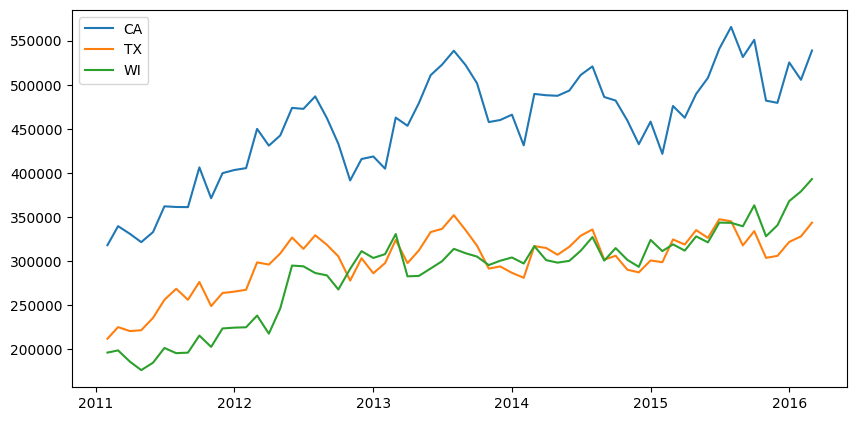

In [14]:
plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for i in range(3):
    plt.plot(monthly_sale_by_state.iloc[i,1:-1],label=monthly_sale_by_state.index[i])
    plt.legend(loc='best')
plt.show()

# **Monthly sales of different categories**

In [15]:
total_sale_by_cat = monthly_sale.groupby(['cat_id'])[(monthly_sale.columns)[:-6]].sum()

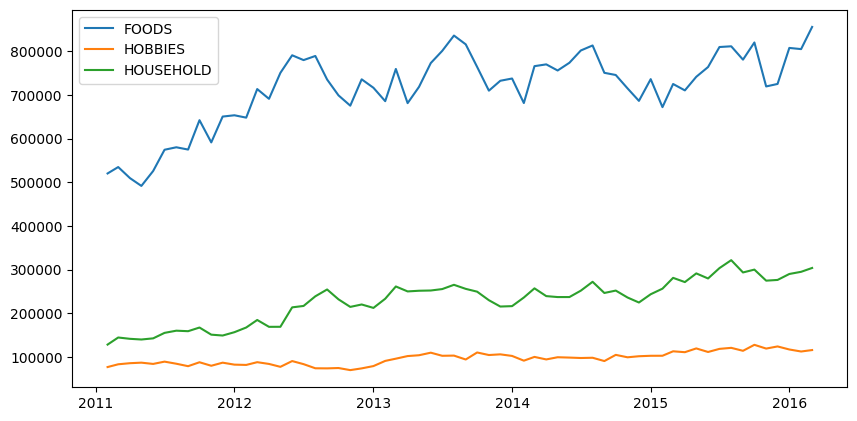

In [16]:
plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for i in range(3):
    plt.plot(total_sale_by_cat.iloc[i,1:-1],label=total_sale_by_cat.index[i])
    plt.legend(loc='best')
plt.show()


# **Total Sales per category**

In [17]:
monthly_sale_by_cat = monthly_sale.groupby(['cat_id'])[(monthly_sale.columns)[:-6]].sum()
monthly_sale_by_cat

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01
cat_id,,,,,,,,,,,,,,,,,,,,,
FOODS,63110,520250,534914,509568,491753,525861,574495,580152,574927,642127,...,809505,811161,780594,819910,719316,725042,807440,804739,855454,702312
HOBBIES,9803,77362,83691,86199,87413,84520,89771,84978,79357,88337,...,118943,121303,114534,128230,119644,124529,117553,112939,116241,97019
HOUSEHOLD,15250,128763,144962,141946,140396,142999,155554,160564,159399,167779,...,303699,321877,293785,300297,275016,276665,290293,295249,304051,247357


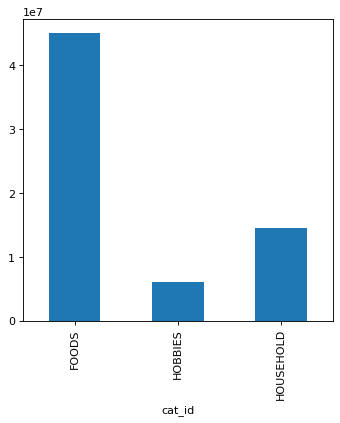

In [18]:
plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='white')
(monthly_sale_by_cat.sum(axis=1)).plot.bar()
plt.show()

# **Monthly sales in different stores**

In [19]:
monthly_sale_by_store = monthly_sale.groupby(['store_id'])[(monthly_sale.columns)[:-6]].sum()
monthly_sale_by_store

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01,2016-01-01,2016-02-01,2016-03-01,2016-04-01
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,11308,89434,93468,91553,87988,90376,96761,95113,92339,105153,...,142973,146168,134939,141987,123590,123656,131598,126655,136557,112847
CA_2,8661,67686,73964,72803,68305,69380,79056,75129,74779,81947,...,117409,128546,122909,131550,117037,120398,128709,121210,126302,110521
CA_3,13351,119792,127344,122428,120711,129867,139377,144376,142568,160365,...,203757,212729,197867,198226,170986,167423,189217,185822,196350,155316
CA_4,4788,41189,44902,44220,44562,43325,46989,46818,51608,58868,...,76812,78229,75816,79262,70434,68080,75868,72017,79721,64733
TX_1,7065,62534,66890,66435,67920,69945,75252,79759,75458,79432,...,106333,103796,93635,96230,88531,89279,93112,93504,100805,81819
TX_2,10520,84900,89902,87683,86128,89914,97076,102564,98961,109783,...,121879,121388,113645,119608,109508,111871,116650,121410,125617,96975
TX_3,8261,64581,68370,66563,67572,75794,83800,86326,81752,87136,...,119295,120029,110554,118225,105675,104831,112028,113196,117252,93751
WI_1,6460,46592,49747,46898,45269,46776,49447,46683,47537,52114,...,110997,109018,102060,111776,102489,110443,113934,109622,114348,95912
WI_2,6196,51708,51113,47651,45487,50737,54426,51072,49721,52652,...,128387,132135,134317,139328,120937,126354,140948,154084,159236,135231


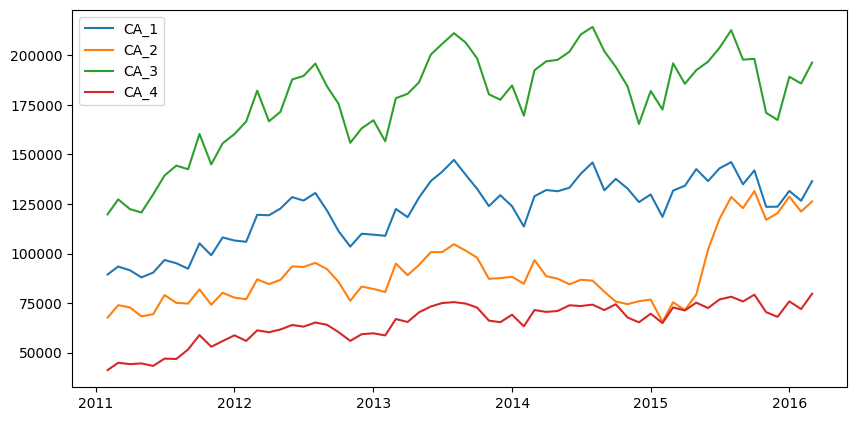

In [20]:
monthly_sale_by_store_CA = monthly_sale_by_store.loc["CA_1" : "CA_4"]

plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for i in range(4):
    plt.plot(monthly_sale_by_store_CA.iloc[i,1:-1],label=monthly_sale_by_store_CA.index[i])
    plt.legend(loc='best')
plt.show()

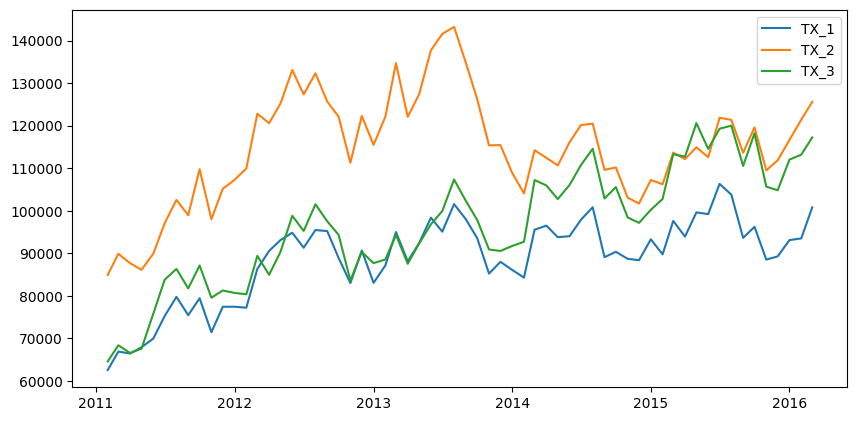

In [21]:
monthly_sale_by_store_TX = monthly_sale_by_store.loc["TX_1" : "TX_3"]

plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for i in range(3):
    plt.plot(monthly_sale_by_store_TX.iloc[i,1:-1],label=monthly_sale_by_store_TX.index[i])
    plt.legend(loc='best')
plt.show()

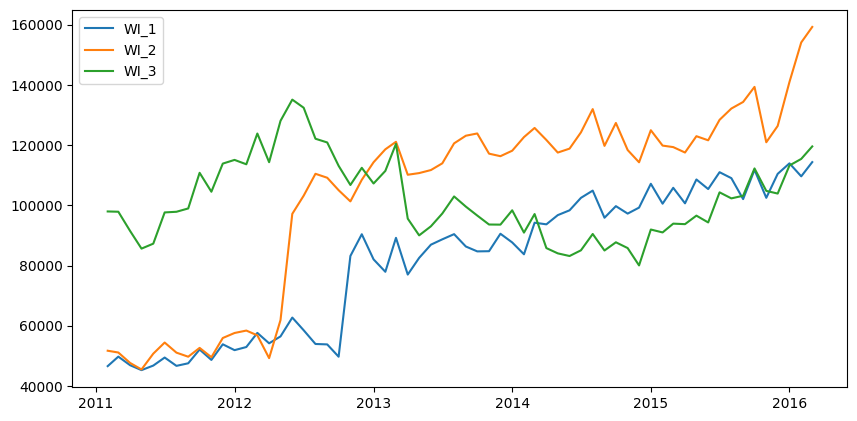

In [22]:
monthly_sale_by_store_WI = monthly_sale_by_store.loc["WI_1" : "WI_3"]

plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for i in range(3):
    plt.plot(monthly_sale_by_store_WI.iloc[i,1:-1],label=monthly_sale_by_store_WI.index[i])
    plt.legend(loc='best')
plt.show()

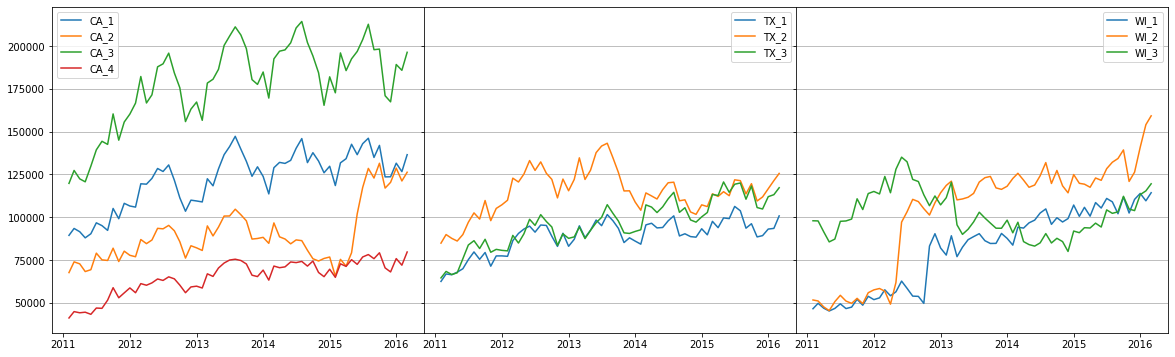

In [23]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (20,6))
for i in range(10):
    n = lambda x : 0 if x == 'C' else (1 if x == 'T' else 2)
    n = n(monthly_sale_by_store.index[i][0])
    ax[n].plot(monthly_sale_by_store.iloc[i,1:-1],label=monthly_sale_by_store.index[i])
    ax[n].grid(b=True,axis='y')
    ax[n].legend(loc='best')
fig.subplots_adjust( wspace=0.0)
plt.show()

# **Monthly Sales in Different Departments of three States**

In [24]:
monthly_sale_by_dept_state = monthly_sale.groupby(['state_id','dept_id'])[(monthly_sale.columns)[6:]].sum()
monthly_sale_by_dept_state

2011-07-01  2011-08-01  2011-09-01  2011-10-01  \
state_id dept_id                                                       
CA       FOODS_1           28881       23903       26582       33026   
         FOODS_2           46412       46897       44904       47766   
         FOODS_3          168038      170737      175724      202860   
         HOBBIES_1         43363       41664       38420       41343   
         HOBBIES_2          1927        1871        1674        2893   
         HOUSEHOLD_1       50227       53715       52286       56056   
         HOUSEHOLD_2       23335       22649       21704       22389   
TX       FOODS_1           11180       10903       12460       14858   
         FOODS_2           37620       38556       36107       37340   
         FOODS_3          140745      153476      143174      153603   
         HOBBIES_1         20886       18710       17073       18796   
         HOBBIES_2          1852        1943        1990        3291   
         HOUSEHOLD_1       34002       34897       35631       37606   
         HOUSEHOLD_2        9843       10164        9736       10857   
WI       FOODS_1           15681       12785       15726       16498   
         FOODS_2           21059       22134       23186       23044   
         FOODS_3          104879      100761       97064      113132   
         HOBBIES_1         20472       19551       19071       20117   
         HOBBIES_2          1271        1239        1129        1897   
         HOUSEHOLD_1       29874       30944       32474       33119   
         HOUSEHOLD_2        8273        8195        7568        7752   

                      2011-11-01  2011-12-01  2012-01-01  2012-02-01  \
state_id dept_id                                                       
CA       FOODS_1           27479       34873       31605       36060   
         FOODS_2           44673       47997       52391       49898   
         FOODS_3          190076      205457      206796      205482   
         HOBBIES_1         37395       40915       39560       38297   
         HOBBIES_2          2068        2667        2097        2514   
         HOUSEHOLD_1       48410       45929       49566       50743   
         HOUSEHOLD_2       21235       21977       21364       22496   
TX       FOODS_1           12768       16212       18596       21127   
         FOODS_2           34788       36680       39174       36130   
         FOODS_3          136277      145214      139506      137366   
         HOBBIES_1         17330       18550       18486       18906   
         HOBBIES_2          2626        2428        1953        2289   
         HOUSEHOLD_1       35585       34561       37568       40173   
         HOUSEHOLD_2        9656       10208       10133       11543   
WI       FOODS_1           15358       20545       20212       23621   
         FOODS_2           22046       24219       27453       23983   
         FOODS_3          107832      119213      117627      114276   
         HOBBIES_1         19322       21099       19569       18593   
         HOBBIES_2          1583        1737        1222        1619   
         HOUSEHOLD_1       29521       29251       31170       33737   
         HOUSEHOLD_2        7059        7566        7327        9137   

                      2012-03-01  2012-04-01  ...  2015-07-01  2015-08-01  \
state_id dept_id                              ...                           
CA       FOODS_1           39074       38127  ...       45176       46052   
         FOODS_2           49432       43195  ...       53530       58203   
         FOODS_3          234350      232114  ...      245723      250992   
         HOBBIES_1         41331       39356  ...       55797       56892   
         HOBBIES_2          2916        2222  ...        4332        4679   
         HOUSEHOLD_1       58721       52801  ...      105119      116701   
         HOUSEHOLD_2       24195       23182  ...       31274       32153   
TX       FOODS_

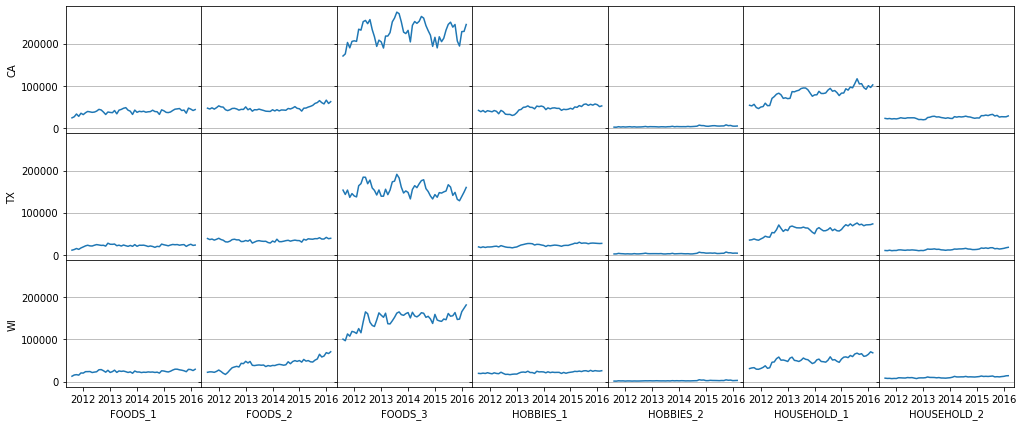

In [25]:
fig, ax = plt.subplots(3, 7, sharey=True,sharex=True,figsize = (17,7))
for i in range(3):
    for j in range(7):
        k = (7*i)+(j)
        ax[i,j].plot(monthly_sale_by_dept_state.iloc[k,1:-1])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = monthly_sale_by_dept_state.index[k][1], ylabel = monthly_sale_by_dept_state.index[k][0])
for a in ax.flat:
    a.label_outer()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)
plt.show()

# **Total Sales with Smoothing fit**

In [26]:
cleaned_sale_train = sale_train.drop(labels=[datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)],axis=1)
cleaned_sale_train

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


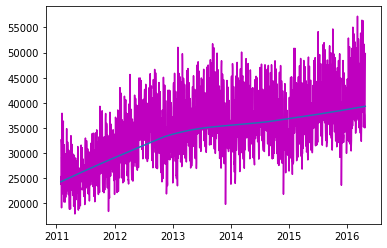

In [27]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
S = cleaned_sale_train.iloc[:,6:].sum()
z = lowess(S.values, range(S.shape[0]))
plt.plot(S,color='m')
plt.plot(pd.Series(z[:,1],S.index))

# **Seasonality in Residuals**


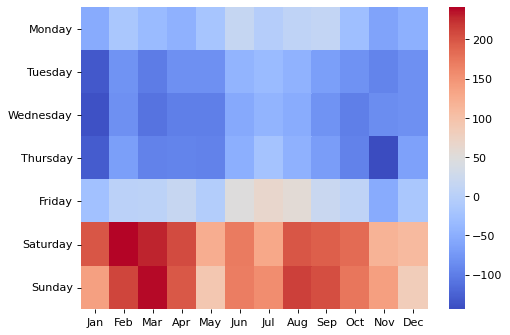

In [28]:
M = cleaned_sale_train.iloc[:,6:].sum()
z = lowess(M, range(M.shape[0]))
Z = M.values - z[:,1]
A = (pd.DataFrame(data=Z,index=M.index)).T
A = A.groupby(A.columns.map(lambda x : str(x.weekday())+'-'+str(x.month)),axis=1).sum()
H = np.zeros((7,12))
for i in range(7):
    for j in range(12):
        H[i,j] = A[str(i)+'-'+str(j+1)]//1000
        
import seaborn as sns
plt.figure(None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(H,cmap='coolwarm',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ])
plt.show()


# **Sales per state with seasonalities**

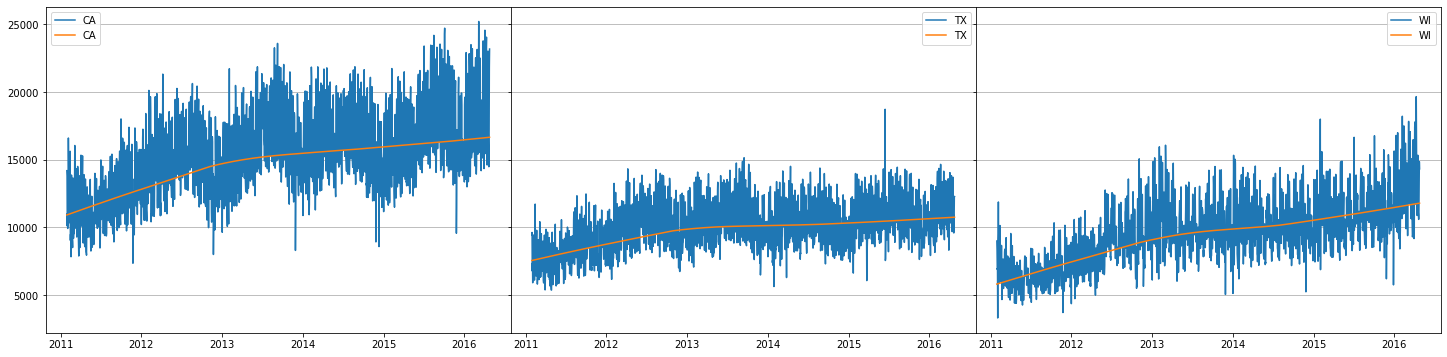

In [29]:
M = cleaned_sale_train.groupby(['state_id'])[(cleaned_sale_train.columns)[6:]].sum()

fig, ax = plt.subplots(1, 3, sharey=True, figsize = (25,6))

for i in range(3):
    ax[i].plot(M.iloc[i,:],label=M.index[i])
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    ax[i].plot(pd.Series(z[:,1],M.columns),label=M.index[i])
    ax[i].grid(b=True,axis='y')
    ax[i].legend(loc='best')

fig.subplots_adjust( wspace=0.0)
plt.show()


# **Weekly Seasonality**

In [30]:
mean_sales = cleaned_sale_train.iloc[:,6:].sum().mean()

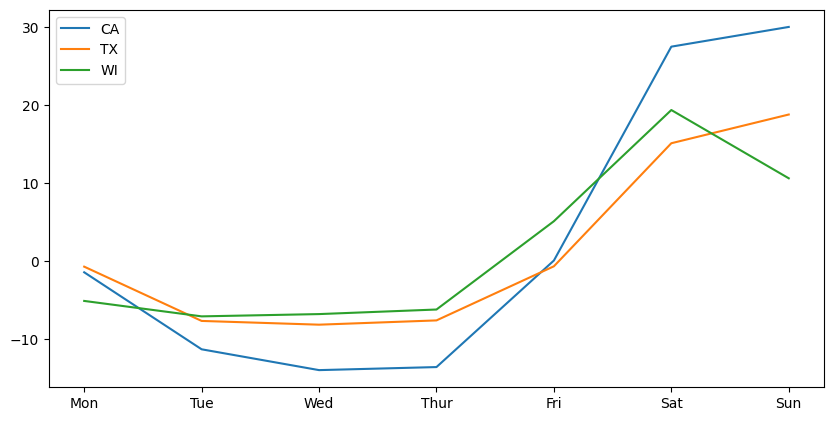

In [31]:
A = M
for i in range(3):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()
plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='white')
for i in range(3):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
    plt.legend(loc='best')
plt.show()

# **Monthly Seasonality**

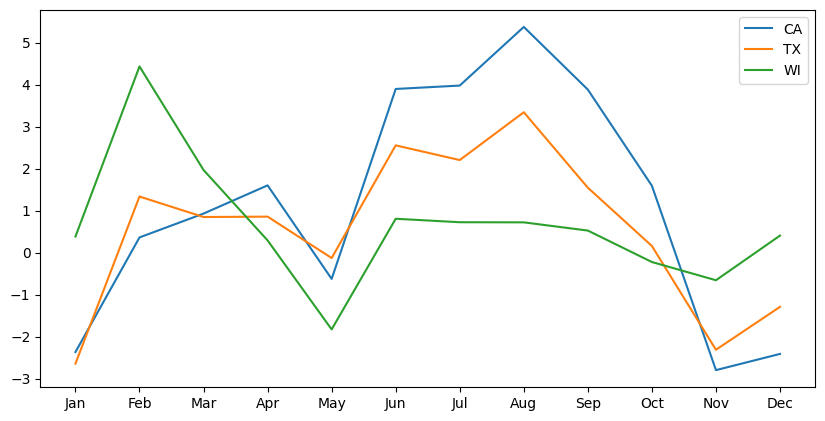

In [32]:
A = M
for i in range(3):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : (x.month)),axis=1).sum()
plt.figure(num=None, figsize=(10,5), dpi=100, facecolor='white')
for i in range(3):
    plt.plot(A.iloc[i,:],label=A.index[i])
    plt.legend(loc='best')
    plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# **Weekly and monthly seasonalities by state and category**

In [33]:
M = cleaned_sale_train.groupby(['cat_id','state_id'])[(cleaned_sale_train.columns)[6:]].sum()
M

2011-01-29  2011-01-30  2011-01-31  2011-02-01  \
cat_id    state_id                                                   
FOODS     CA             10101        9862        6944        7864   
          TX              6853        7030        5124        5470   
          WI              6224        5866        5106        5544   
HOBBIES   CA              1802        1561        1472        1405   
          TX               879         870         526         809   
          WI              1083         926         684         455   
HOUSEHOLD CA              2292        2382        1692        1778   
          TX              1706        1730        1128        1102   
          WI              1691        1522        1107         985   

                    2011-02-02  2011-02-03  2011-02-04  2011-02-05  \
cat_id    state_id                                                   
FOODS     CA              7178        8256        9005       11870   
          TX              4602        7067        4671        7055   
          WI              2823        6770        6814        8826   
HOBBIES   CA              1181        1459        1314        1986   
          TX               501         831         390         785   
          WI               132         930        1240        1215   
HOUSEHOLD CA              1566        1607        1932        2754   
          TX               809        1108        1165        1600   
          WI               354        1183        1479        1841   

                    2011-02-06  2011-02-07  ...  2016-04-15  2016-04-16  \
cat_id    state_id                          ...                           
FOODS     CA             10977        8637  ...       10732       13094   
          TX              6920        5505  ...        6994        7944   
          WI              6965        4759  ...       10956       10969   
HOBBIES   CA              1482        1508  ...        1658        2176   
          TX               794         524  ...        1107        1124   
          WI               623         583  ...        1021        1334   
HOUSEHOLD CA              2237        1677  ...        3865        5294   
          TX              1662        1290  ...        2699        3392   
          WI              1076        1089  ...        2757        3035   

                    2016-04-17  2016-04-18  2016-04-19  2016-04-20  \
cat_id    state_id                                                   
FOODS     CA             14855       11217       10088        9863   
          TX              8717        6834        7066        6242   
          WI             10925        8100        7794        7527   
HOBBIES   CA              2330        1706        1849        1646   
          TX              1461         830        1025         980   
          WI              1029         787         913         846   
HOUSEHOLD CA              5847        4129        3847        3639   
          TX              3531        2204        2831        2378   
          WI              2945        2252        2157        2222   

                    2016-04-21  2016-04-22  2016-04-23  2016-04-24  
cat_id    state_id                                                  
FOODS     CA              9479       10991       13845       14806  
          TX              6167        6839        7849        7765  
          WI              7671        8874       10233       10083  
HOBBIES   CA              1590        2015        2367        2357  
          TX               882        1056        1222        1266  
          WI               881        1014        1198        1060  
HOUSEHOLD CA              3419        4089        5622        6024  
          TX              2553        2720        3195        3251  
          WI              2391        2919        3431        3183  

[9 rows x 1908 columns]

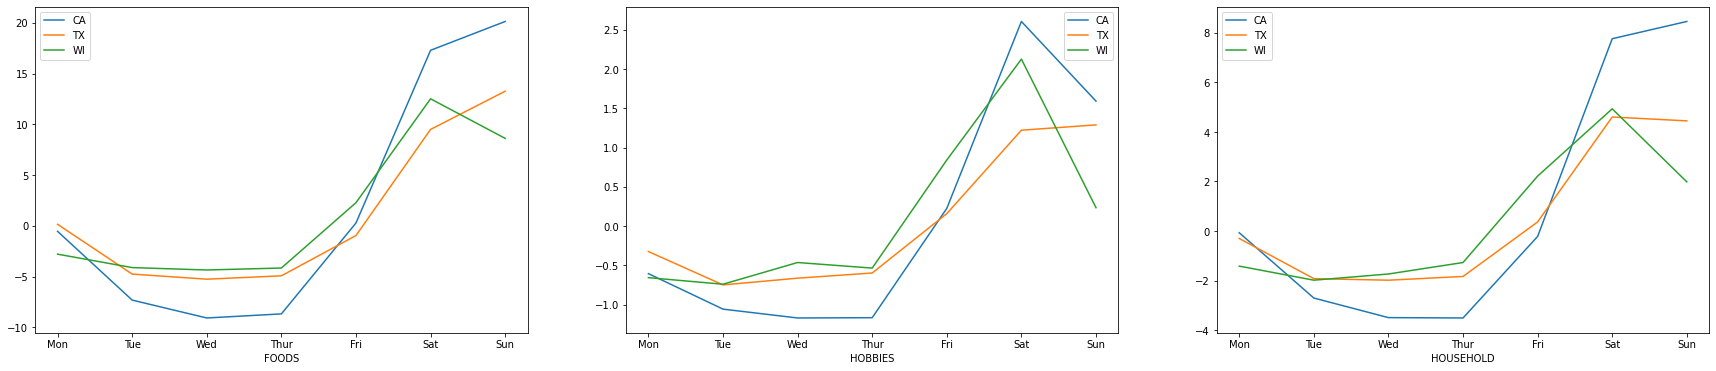

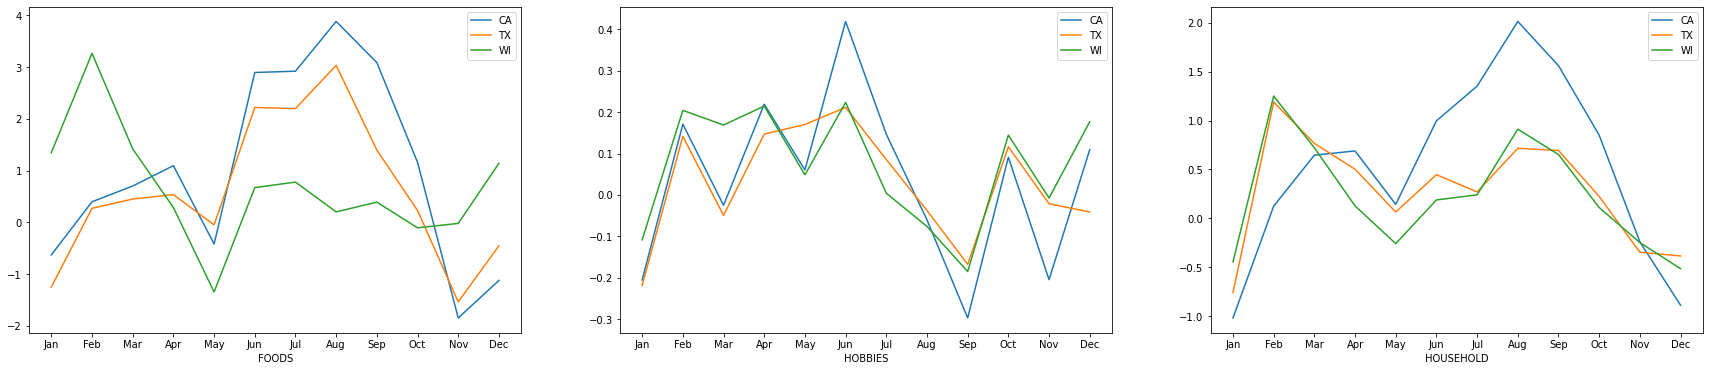

In [34]:
A = M
for i in range(9):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
G = A/mean_sales
A = G.groupby(G.columns.map(lambda x : str(x.weekday())),axis=1).sum()
fig, ax = plt.subplots(1,3,figsize = (30,6),sharex=True)
for i in range(9):
    ax[(i//3)].plot(A.iloc[i,:],label=A.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = A.index[i][0])
plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
plt.show()

B = G.groupby(G.columns.map(lambda x : x.month),axis=1).sum()
fig, ax = plt.subplots(1,3,figsize = (30,6), sharex=True)
for i in range(9):
    ax[(i//3)].plot(B.iloc[i,:],label=B.index[i][1])
    ax[(i//3)].legend(loc='best')
    ax[i//3].set(xlabel = B.index[i][0])
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


# **Event vs Non-event days**

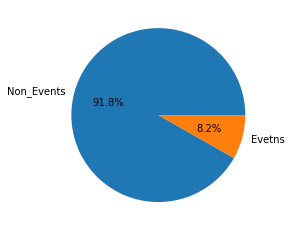

In [35]:
Non_events = calendar.date.count() - calendar.event_name_1.count()
Events = calendar.event_name_1.count()
pd.Series([Non_events,Events], ['Non_Events',"Evetns"],name="").plot.pie(autopct='%1.1f%%')
plt.show()


# **Relative number of types of events**

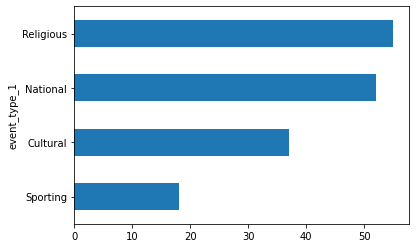

In [36]:
calendar.groupby(['event_type_1']).count().iloc[:,1].sort_values(ascending=True).plot.barh()
plt.show()

# **SNAP days eac month in different states**

In [37]:
'''import matplotlib as mpl
import calmap

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Settings
years = [2012] 
weeks = [1, 2, 3, 4, 5, 6]
days = ['M', 'T', 'W', 'T', 'F', 'S', 'S']
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

def generate_data():
    idx = pd.date_range('2012-01-01', periods=182, freq='D')
    return pd.Series(range(len(idx)), index=idx)


def split_months(df, year):
    """
    Take a df, slice by year, and produce a list of months,
    where each month is a 2D array in the shape of the calendar
    :param df: dataframe or series
    :return: matrix for daily values and numerals
    """
    df = df[df.index.year == year]


    # Empty matrices
    a = np.empty((6, 7))
    a[:] = np.nan

    day_nums = {m:np.copy(a) for m in range(1,7)}  # matrix for day numbers
    day_vals = {m:np.copy(a) for m in range(1,7)}  # matrix for day values

    # Logic to shape datetimes to matrices in calendar layout
    for d in df.iteritems():  # use iterrows if you have a DataFrame

        day = d[0].day
        month = d[0].month
        col = d[0].dayofweek

        if d[0].is_month_start:
            row = 0

        day_nums[month][row, col] = day  # day number (0-31)
        day_vals[month][row, col] = d[1] # day value (the heatmap data)

        if col == 6:
            row += 1

    return day_nums, day_vals


def create_year_calendar(day_nums, day_vals, X, name):
    fig, ax = plt.subplots(1, 6, figsize=(20, 12))

    for i, axs in enumerate(ax.flat):

        axs.imshow(day_vals[i+1], cmap='viridis', vmin=1, vmax=365)  # heatmap
        axs.set_title(month_names[i])

        # Labels
        axs.set_xticks(np.arange(len(days)))
        axs.set_xticklabels(days, fontsize=10, fontweight='bold', color='#555555')
        axs.set_yticklabels([])

        # Tick marks
        axs.tick_params(axis=u'both', which=u'both', length=0)  # remove tick marks
        axs.xaxis.tick_top()

        # Modify tick locations for proper grid placement
        axs.set_xticks(np.arange(-.5, 6, 1), minor=True)
        axs.set_yticks(np.arange(-.5, 6, 1), minor=True)
        axs.grid(which='minor', color='w', linestyle='-', linewidth=2.1)

        # Despine
        for edge in ['left', 'right', 'bottom', 'top']:
            axs.spines[edge].set_color('#FFFFFF')

        # Annotate
        for w in range(len(weeks)):
            for d in range(len(days)):
                day_num = day_nums[i+1][w, d]
                if not np.isnan(day_num):    # Value label
                    axs.text(d, w, f"{day_num:0.0f}",
                             ha="center", va="center",
                             fontsize=15, color="k", alpha=0.8)
                    patch_coords = ((d - 0.5, w - 0.5),
                                    (d - 0.5, w + 0.5),
                                    (d + 0.5, w + 0.5),
                                    (d + 0.5, w - 0.5))
                    if datetime.datetime.strptime(str(years[0])+'-'+str(i+1)+'-'+str(int(day_num)), '%Y-%m-%d').date().strftime('%Y-%m-%d') in X:
                        square = Polygon(patch_coords, fc='#FF4500')  #FF4500
                        axs.add_artist(square)
                    else:
                        square = Polygon(patch_coords, fc='#DDDDDD')
                        axs.add_artist(square)

    # Final adjustments
    fig.suptitle(name + ' 2012', fontsize=20)
    plt.subplots_adjust(left=0.04, right=0.96, top=1, bottom=0.65)
    plt.show()



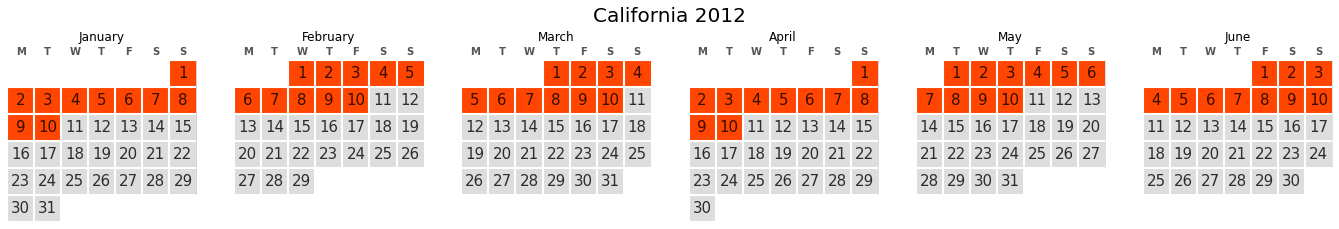

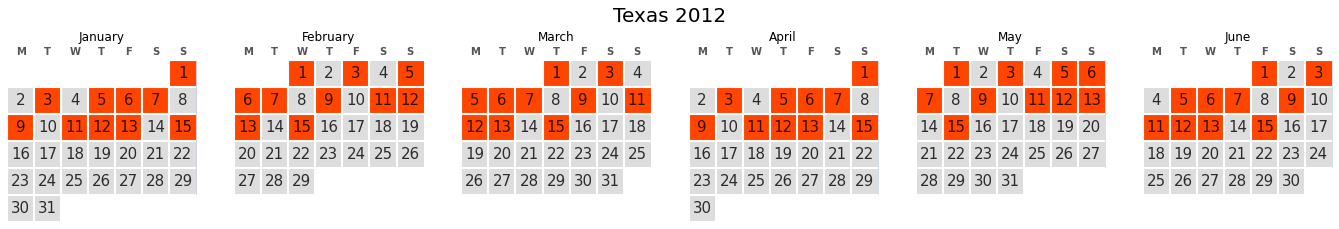

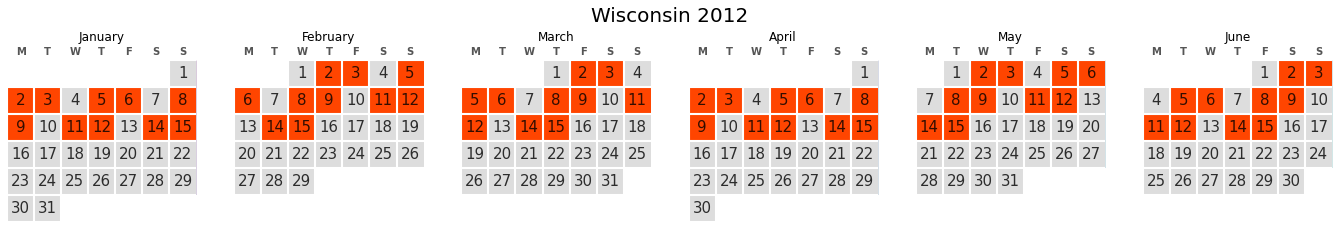

In [38]:
CA = calendar.date[calendar.snap_CA == 1].values
TX = calendar.date[calendar.snap_TX == 1].values
WI = calendar.date[calendar.snap_WI == 1].values
df = generate_data()
day_nums, day_vals = split_months(df,2012)
create_year_calendar(day_nums, day_vals,CA,'California')
create_year_calendar(day_nums, day_vals,TX,'Texas')
create_year_calendar(day_nums, day_vals,WI,'Wisconsin')


# **Item prices distributions of different departments of three states**

In [39]:
A=sell_prices.groupby([sell_prices.store_id.str.slice(0,-2),sell_prices.item_id.str.slice(0,-4)])
B = []
for name, group in A:
    B.append(name)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

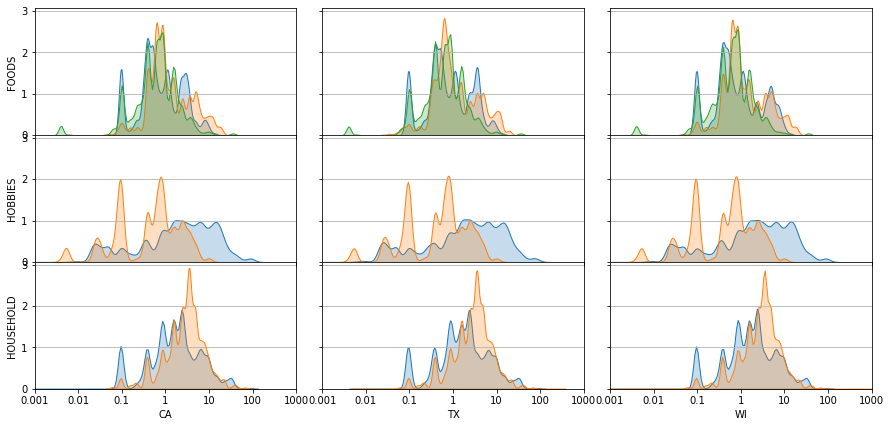

In [40]:
import seaborn as sns
fig, ax = plt.subplots(3,3,sharey=True,sharex=True, figsize=(15,7))
k=0
for j in range(3):
    for i in range(0,1):
        sns.kdeplot(np.log10(A.get_group(B[k])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+1])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+2])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1else'WI'), ylabel ="FOODS")
    for i in range(1,2):
        sns.kdeplot(np.log10(A.get_group(B[k+3])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+4])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1else'WI'),ylabel = "HOBBIES")
    for i in range(2,3):
        sns.kdeplot(np.log10(A.get_group(B[k+5])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+6])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1else'WI'),ylabel ="HOUSEHOLD")
    k=k+7
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
fig.subplots_adjust( hspace = 0.0,wspace=0.1)
plt.show()

# **Item prices distributions of different departments per year**

In [41]:
A=sell_prices.groupby([sell_prices.item_id.str.slice(0,-4),sell_prices.wm_yr_wk//100 + 1900])['sell_price']
n = []
for name,group in A:
    n.append(name)
    
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

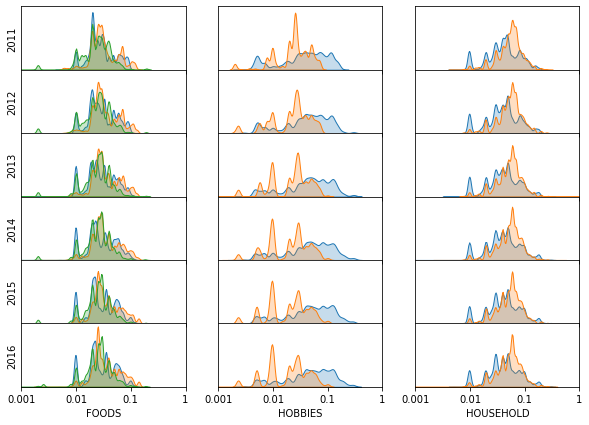

In [42]:
import seaborn as sns
fig, ax = plt.subplots(6,3,sharey=True,sharex=True, figsize=(10,7))

for i in n:
    j = 0 if i[0][:-2]=='FOODS' else (1 if i[0][:-2]=='HOBBIES' else 2)
    k = i[1] - 2011
    sns.kdeplot(np.log10(A.get_group(i)),legend=False,bw=0.1,shade=True,ax=ax[k,j])
    ax[k,j].set(xlabel = i[0][:-2], ylabel =k+2011)
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
plt.yticks([], [])
fig.subplots_adjust( hspace = 0.0,wspace=0.2)
plt.show()

# **Sales per category during Event and Non-Event days**

In [43]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale_train.drop(labels=c,axis=1)
event_dates = calendar[pd.notnull(calendar['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

for i in c:
    event_dates.remove(i)
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]


In [44]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = event_sales.groupby(['cat_id']).sum()
ne = nevent_sales.groupby(['cat_id']).sum()
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)


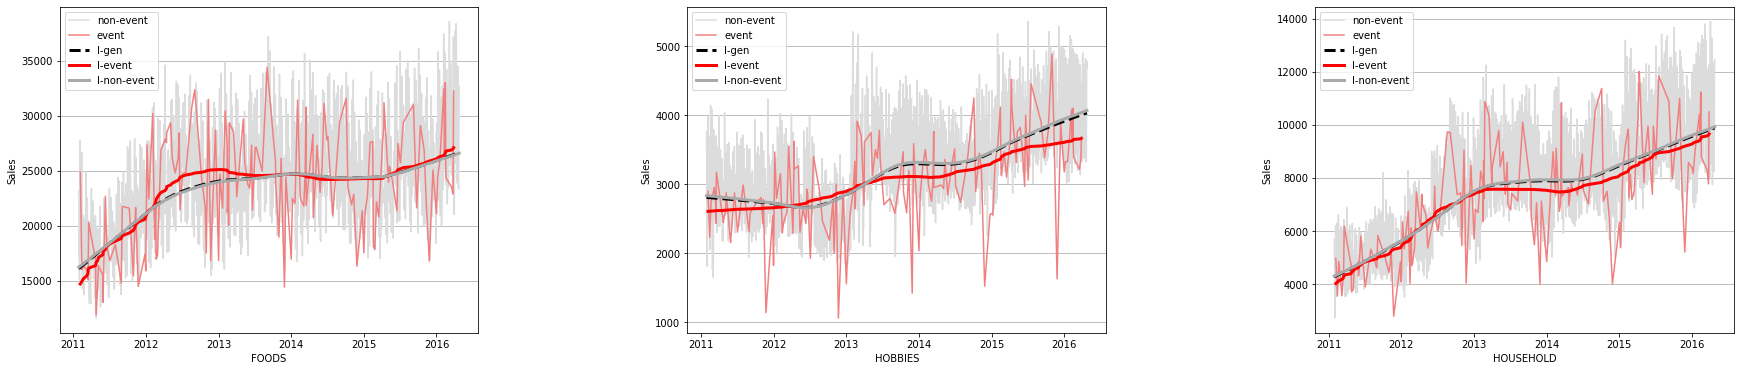

In [45]:
fig, ax = plt.subplots(1,3, figsize=(30,6))
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='lightcoral',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='red',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.show()


In [46]:
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])

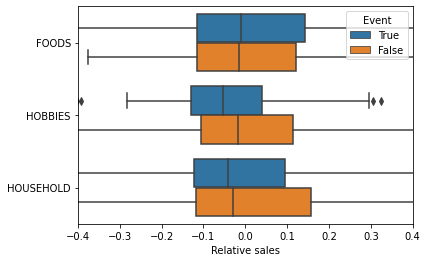

In [47]:
a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 

a.set(xlabel="Relative sales",ylabel='')
a.set_xlim(-0.4, 0.4)
plt.show()

In [48]:
N3 = []
means = []
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale_train.drop(labels=c,axis=1)
event_dates = calendar[pd.notnull(calendar['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date']]

for i in c:
    event_dates = event_dates[event_dates['date'] != i]


s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])

[Text(0, 0.5, ''), Text(0.5, 0, 'Median sales')]

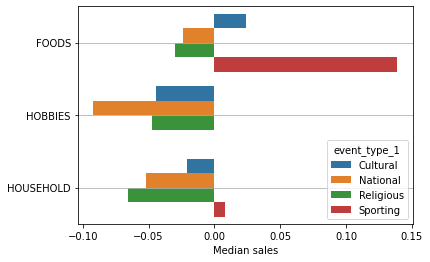

In [49]:
a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
a.grid(b=True,axis='y')
a.set(xlabel="Median sales",ylabel='')

# **Sales in different states during Event and Non-event days**

In [50]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale_train.drop(labels=c,axis=1)
event_dates = calendar[pd.notnull(calendar['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

for i in c:
    event_dates.remove(i)
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]

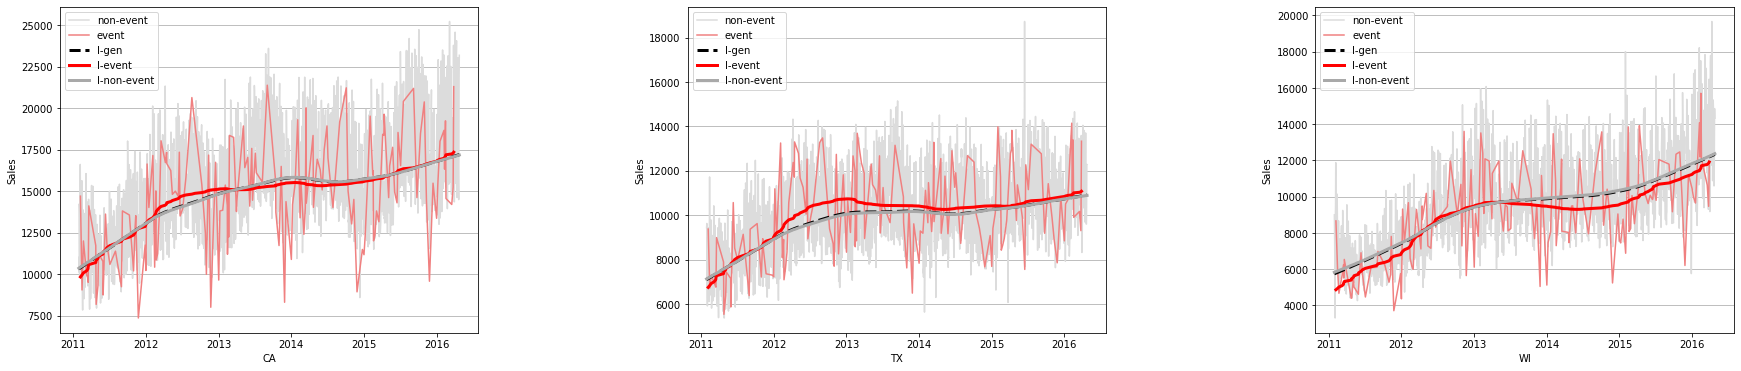

In [51]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = event_sales.groupby(['state_id']).sum()
ne = nevent_sales.groupby(['state_id']).sum()
t = F.groupby(['state_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)
fig, ax = plt.subplots(1,3, figsize=(30,6))
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='lightcoral',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='red',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.show()


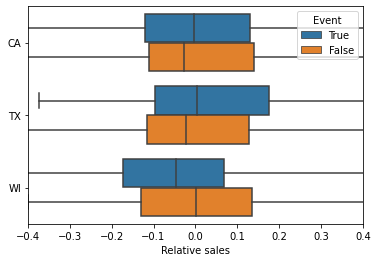

In [52]:
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])
a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 

a.set(xlabel="Relative sales",ylabel='')
a.set_xlim(-0.4, 0.4)
plt.show()

[Text(0, 0.5, ''), Text(0.5, 0, 'Median sales')]

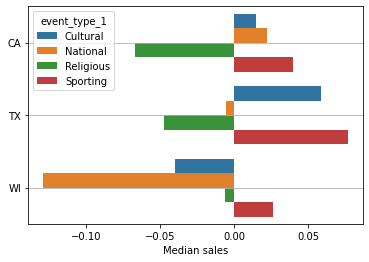

In [53]:

N3 = []
means = []
t = F.groupby(['state_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

event_dates = calendar[pd.notnull(calendar['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date'].values]
for i in c:
    event_dates = event_dates[event_dates['date'] != i]
event_dates = event_dates.iloc[:-8,:]

s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])


a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
a.grid(b=True,axis='y')
a.set(xlabel="Median sales",ylabel='')

# **Sales per state on SNAP vs Non-SNAP days**

In [54]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale_train.drop(labels=c,axis=1)
F = F.groupby(['state_id']).sum()
CA_snap = calendar.date[calendar.snap_CA == 1].values
TX_snap = calendar.date[calendar.snap_TX == 1].values
WI_snap = calendar.date[calendar.snap_WI == 1].values
CA_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in CA_snap]
TX_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in TX_snap]
WI_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in WI_snap]

CA_snap_sales = F[CA_snap[:-20]].iloc[0,:]
TX_snap_sales = F[TX_snap[:-20]].iloc[1,:]
WI_snap_sales = F[WI_snap[:-20]].iloc[2,:]

CA_nsnap_sales = F[F.drop(columns=CA_snap[:-20]).columns].iloc[0,:]
TX_nsnap_sales = F[F.drop(columns=TX_snap[:-20]).columns].iloc[1,:]
WI_nsnap_sales = F[F.drop(columns=WI_snap[:-20]).columns].iloc[2,:]


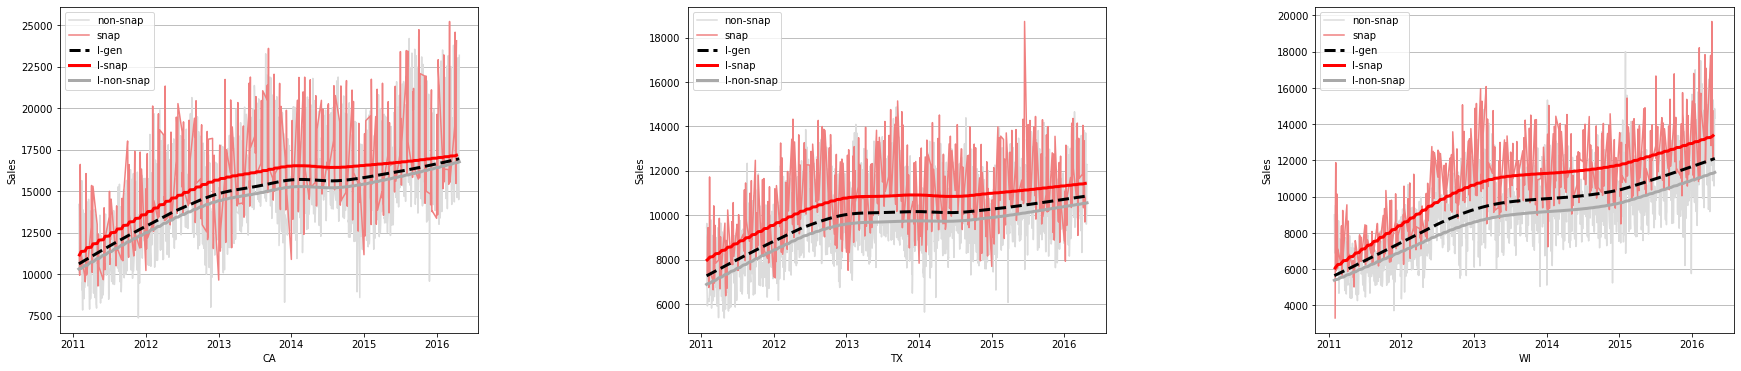

In [55]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = [CA_snap_sales,TX_snap_sales,WI_snap_sales]
ne = [CA_nsnap_sales,TX_nsnap_sales,WI_nsnap_sales]
t = F
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e[i].values, range(len(e[i])),frac=0.5)
    n2 = lowess(ne[i].values, range(len(ne[i])),frac=0.5)
    nn3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n1 = pd.Series(n1[:,1],e[i].index)
    n2 = pd.Series(n2[:,1],ne[i].index)
    n3 = pd.Series(nn3[:,1],t.columns)
    L1.append(n1)
    L2.append(n2)
    L3.append(n3)
    n3 = (t.iloc[i,:] - nn3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

fig, ax = plt.subplots(1,3, figsize=(30,6))
for j in range(3):
    ax[j].plot(ne[j] ,color='gainsboro', label = 'non-snap')
    ax[j].plot(e[j],color='lightcoral',label = 'snap') 
    ax[j].plot(L3[j] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1[j] ,color='red',label = 'l-snap',linewidth=3)   
    ax[j].plot(L2[j] ,color = 'darkgray',label = 'l-non-snap',linewidth=3) 
    ax[j].grid(b=True,axis='y')
    ax[j].legend(loc='best')
    ax[j].set(xlabel = t.index[j] ,ylabel = 'Sales')

fig.subplots_adjust( hspace = 0.0,wspace=0.5)
plt.show()


# **Daily Sales percentage on SNAP and Non-SNAP days**

In [56]:
perc = []
for i in range(3):
    a = e[i].sum()/(1908/3)
    b = ne[i].sum()/(2*1908/3)
    perc.append([a*100/(a+b), b*100/(a+b)])

perc = pd.DataFrame(perc,index=["CA","TX","WI"],columns=["SNAP","NON_SNAP"])
perc.reset_index(drop=False, inplace=True)
s = perc.melt(id_vars=['index'], value_vars=perc.columns[1:])
s = s.sort_values(by='index',ignore_index=True)

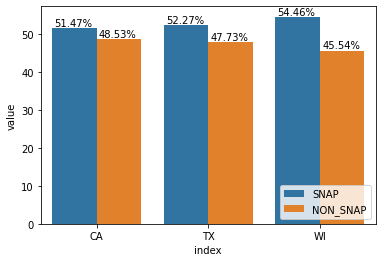

In [57]:
ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
ax.legend(loc = 'lower right')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
            xytext=(-20,5), textcoords='offset points', ha="left", va="center")

# **Daily Sales percentage on SNAP and Non-SNAP days per category**

In [58]:
F  = sale_train.groupby(['state_id','cat_id']).sum()
F.reset_index(drop=False, inplace=True)
l = [CA_snap[:-20],TX_snap[:-20],WI_snap[:-20]]

t = []
for i in range(9):
    t.append((F['state_id'][i],F['cat_id'][i]))
    
a=[]
b = []
perc = []
for i in range(9):
    a.append(F[l[i//3]].loc[i,:].sum()/(1908/3))
    b.append(F[F.drop(columns=l[i//3]).columns].iloc[i,3:].sum()/(2*1908/3))
    perc.append([a[i]*100/(a[i]+b[i]), b[i]*100/(a[i]+b[i])])
perc = pd.DataFrame(perc,index=t,columns=["SNAP","NON_SNAP"])
perc.reset_index(drop=False, inplace=True)
s = perc.melt(id_vars=['index'], value_vars=perc.columns[1:])
s = s.sort_values(by='index',ignore_index=True)

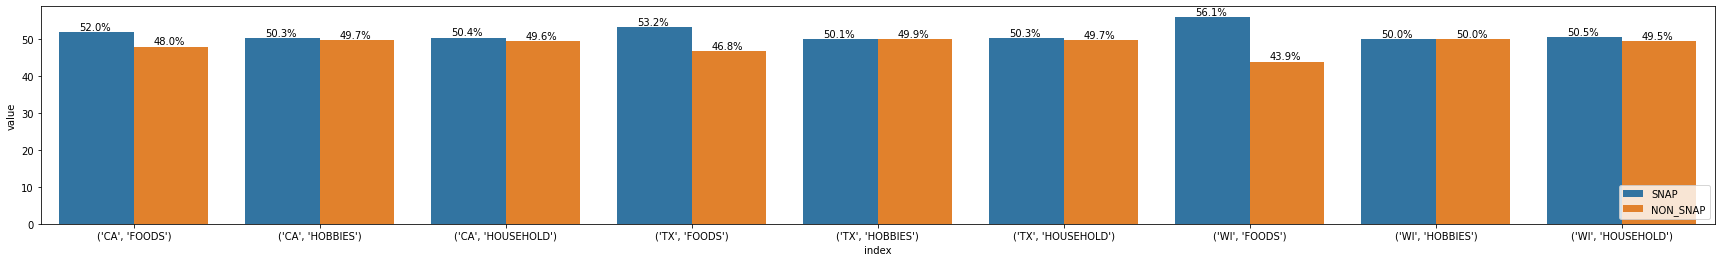

In [59]:
fig, ax = plt.subplots(figsize=(30,4))
ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
ax.legend(loc = 'lower right')

for p in ax.patches:
    ax.annotate("%.1f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
            xytext=(-17,5), textcoords='offset points', ha="left", va="center")


# **SNAP impact on Food sales in CA**
Relative sales on SNAP days - Relative sales on other days
Red -- high SNAP effect and Blue -- low SNAP effect

In [60]:
z = F.drop(labels=c,axis=1).iloc[0,2:]
n1 = lowess(z.values, range(1908),frac=0.5)
rel_sales = (z.values - n1[:,1]) / z.mean()
rel_sales = pd.Series(rel_sales,z.index)

rel_sales1 = rel_sales[CA_snap[:-20]]
rel_sales2 = rel_sales.drop(labels = CA_snap[:-20])

a = rel_sales1.groupby(rel_sales1.index.map(lambda x : str(x.weekday())+'-'+str(x.month))).sum()
b = rel_sales2.groupby(rel_sales2.index.map(lambda x : str(x.weekday())+'-'+str(x.month))).sum()

H = np.zeros((7,12))
for i in range(7):
    for j in range(12):
        H[i,j] = a[str(i)+'-'+str(j+1)] - b[str(i)+'-'+str(j+1)]

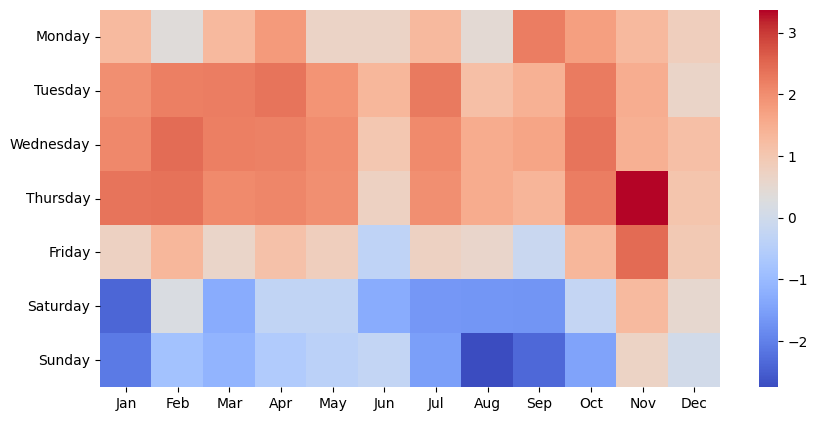

In [61]:
import seaborn as sns
plt.figure(None, figsize=(10, 5), dpi=100, facecolor='white')
ax = sns.heatmap(H,cmap='coolwarm',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ])
plt.show()

# **Sales for Three random items in mid of 2015 with Black points as Events and Gray Background representing SNAP days**

In [62]:
x = sale_train[sale_train['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].loc[:,datetime.date(2015,5,1):datetime.date(2015,10,1)]

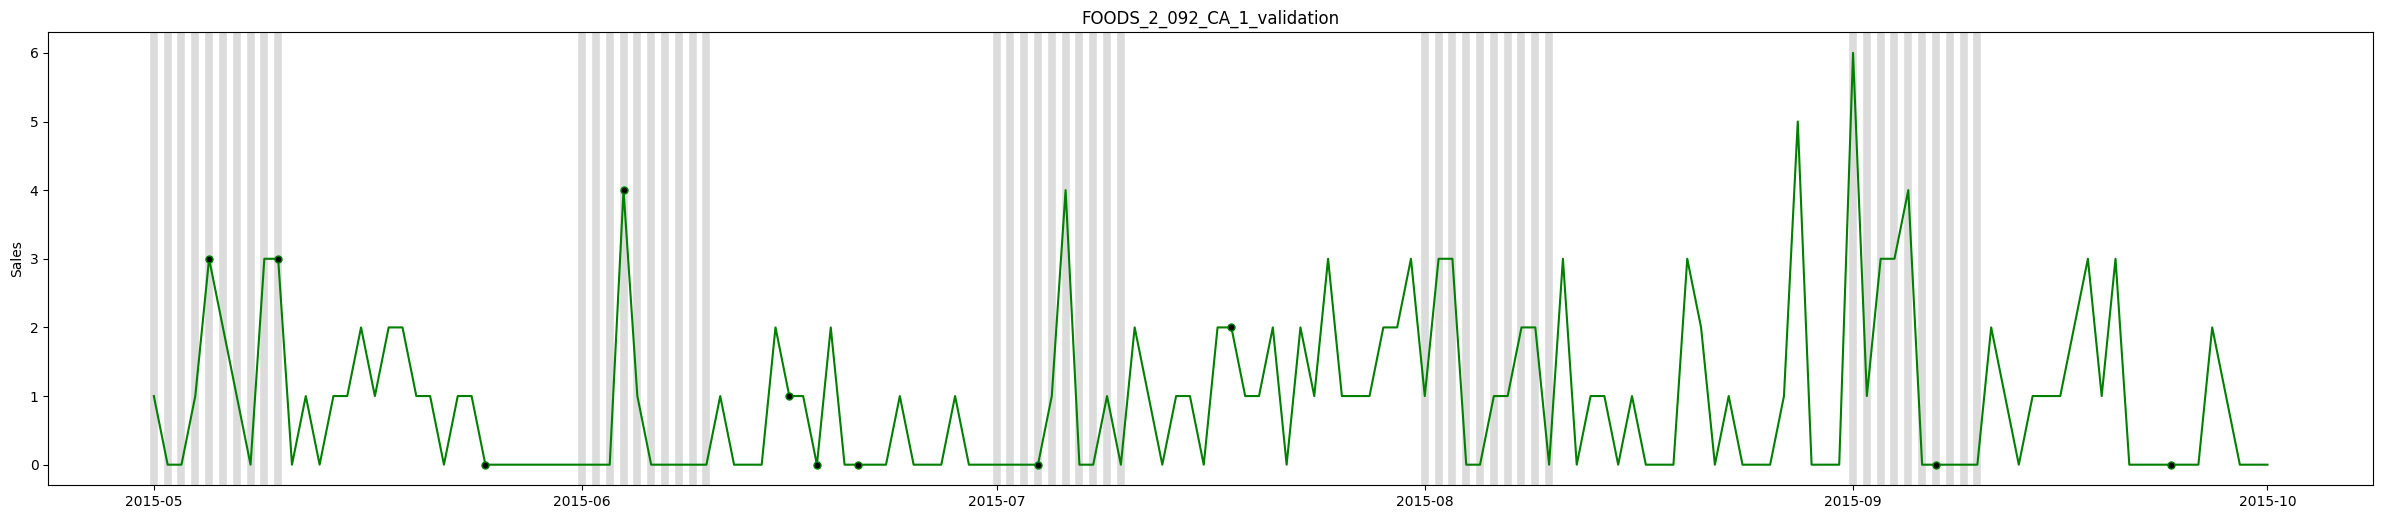

In [63]:
v = event_dates[event_dates['date'].isin([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = list(set(CA_snap) & set([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)]))
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
plt.figure(None, figsize=(30, 6), dpi=100, facecolor='white')
for i in range(len(c)):
    plt.axvline(c[i],color='gainsboro',linewidth=5.5)
plt.plot(x.iloc[0,:], '-gd', markevery = d,markerfacecolor='black',marker='.',markersize=10)
plt.title("FOODS_2_092_CA_1_validation")
plt.ylabel("Sales")
plt.show()

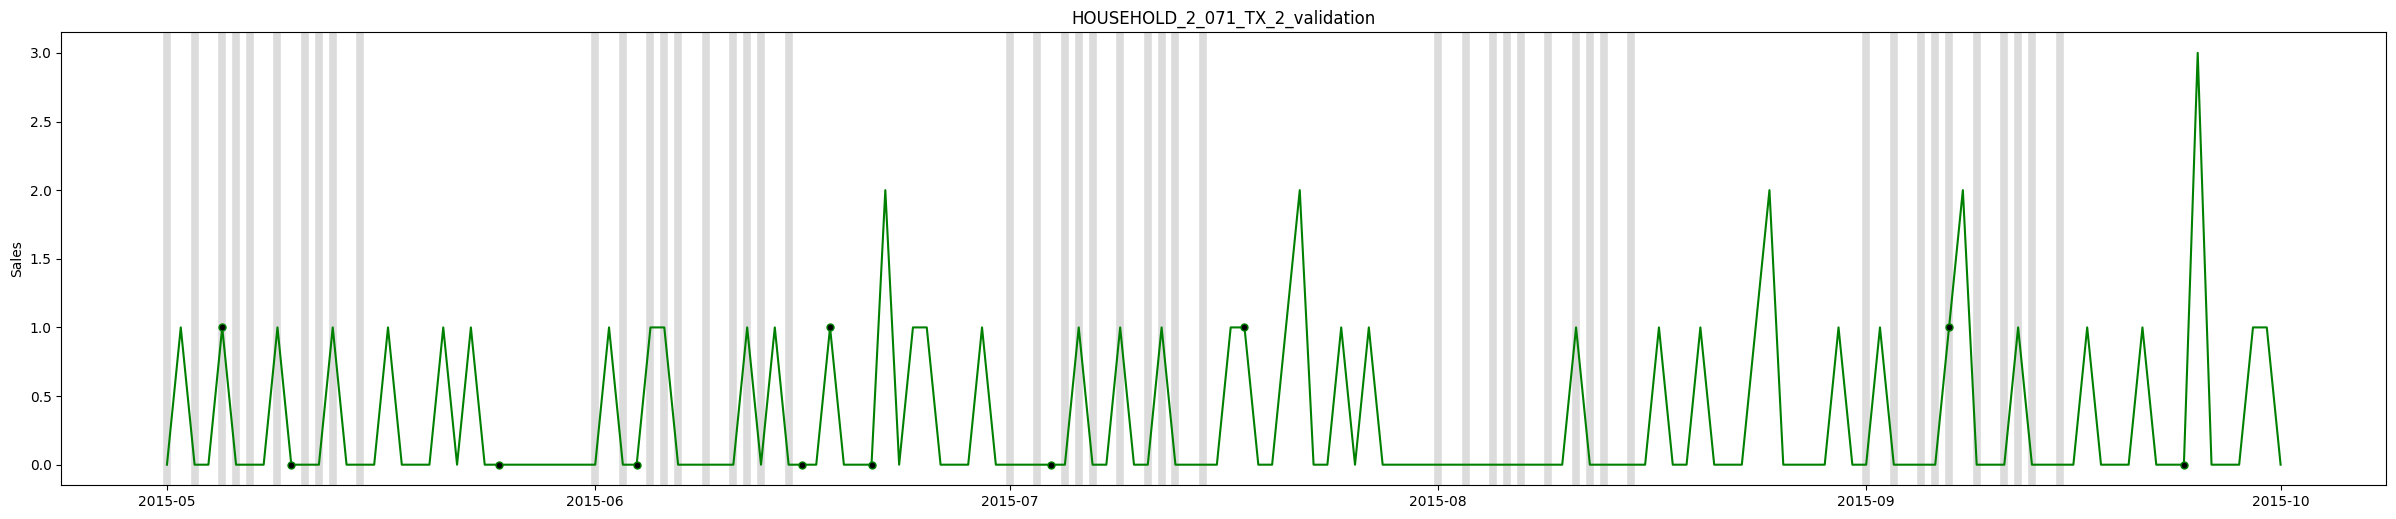

In [64]:
v = event_dates[event_dates['date'].isin([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = list(set(TX_snap) & set([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)]))
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
plt.figure(None, figsize=(30,6), dpi=100, facecolor='white')
for i in range(len(c)):
    plt.axvline(c[i],color='gainsboro',linewidth=5.5)
plt.plot(x.iloc[1,:], '-gd', markevery = d,markerfacecolor='black',marker='.',markersize=10)
plt.title("HOUSEHOLD_2_071_TX_2_validation")
plt.ylabel("Sales")
plt.show()


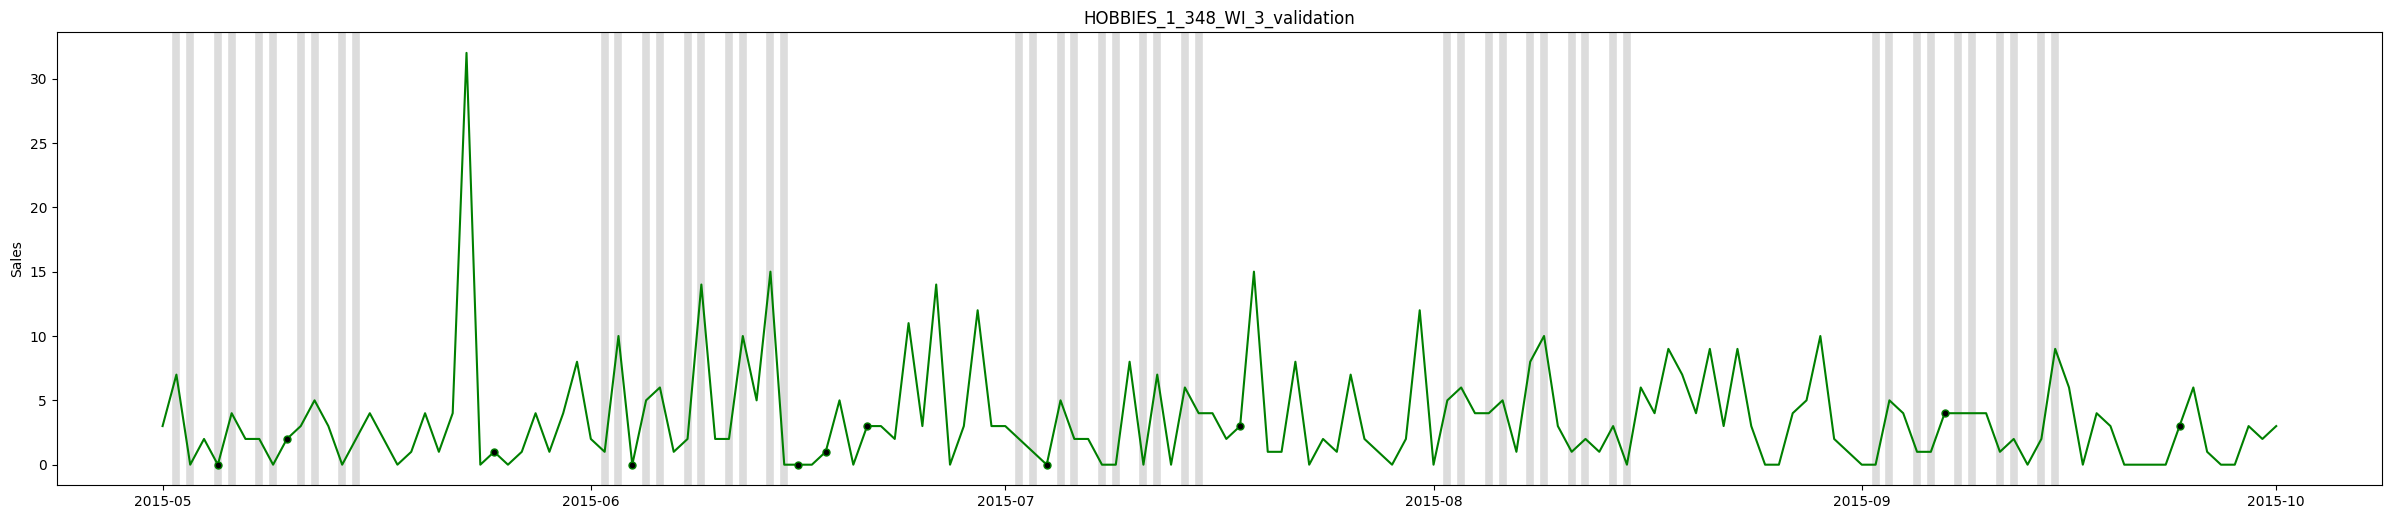

In [65]:
v = event_dates[event_dates['date'].isin([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = list(set(WI_snap) & set([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)]))
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    

plt.figure(None, figsize=(30, 6), dpi=100, facecolor='white')
for i in range(len(c)):
    plt.axvline(c[i],color='gainsboro',linewidth=5.5)
plt.plot(x.iloc[2,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
plt.title("HOBBIES_1_348_WI_3_validation")
plt.ylabel("Sales")
plt.show()

# **Sales of 3 random items with price change in background**

In [66]:
import matplotlib
x = sale_train[sale_train['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].iloc[:,6:]

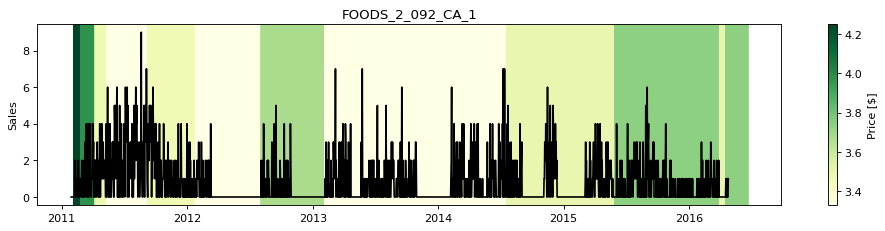

In [67]:
z = sell_prices[(sell_prices['store_id']=='CA_1') & (sell_prices['item_id']=='FOODS_2_092')]
z=calendar[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
y = []
u = u[1:]
for i in u:
    y.append(z.groupby(['sell_price']).get_group(i)['date'].values)
    
plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(y)):
    for j in range(len(y[i])):
        plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()), cmap='YlGn').to_rgba(u[i]))
plt.plot(x.iloc[0,:],color='black')
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()), cmap='YlGn'),label='Price [$]')
plt.title("FOODS_2_092_CA_1")
plt.ylabel("Sales")
plt.show()

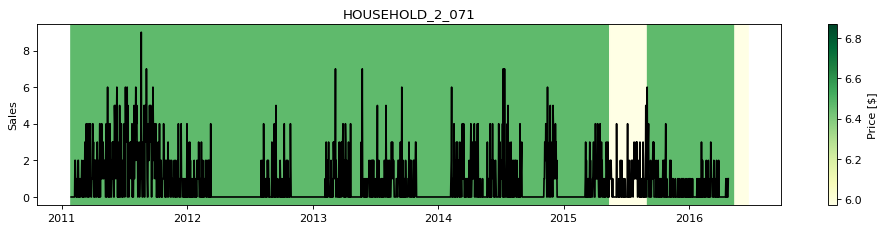

In [68]:
z = sell_prices[(sell_prices['store_id']=='TX_2') & (sell_prices['item_id']=='HOUSEHOLD_2_071')]
z=calendar[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
y = []
for i in u:
    y.append(z.groupby(['sell_price']).get_group(i)['date'].values)

plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(y)):
    for j in range(len(y[i])):
        plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.4), cmap='YlGn').to_rgba(u[i]))
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.4), cmap='YlGn'),label='Price [$]')
plt.plot(x.iloc[0,:],color='black')
plt.title("HOUSEHOLD_2_071")
plt.ylabel("Sales")
plt.show()

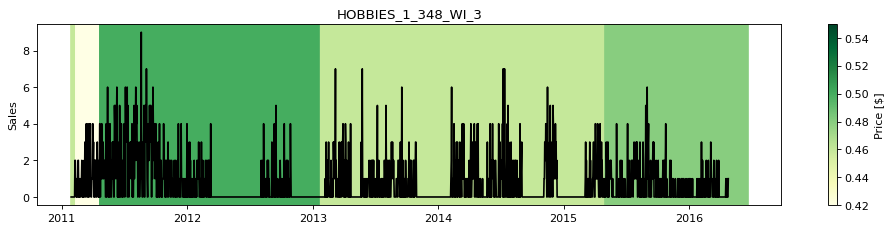

In [69]:
z = sell_prices[(sell_prices['store_id']=='WI_3') & (sell_prices['item_id']=='HOBBIES_1_348')]
z=calendar[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
y = []
for i in u:
    y.append(z.groupby(['sell_price']).get_group(i)['date'].values)

plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(y)):
    for j in range(len(y[i])):
        plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.05), cmap='YlGn').to_rgba(u[i]))
plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.05), cmap='YlGn'),label='Price [$]')
plt.plot(x.iloc[0,:],color='black')
plt.title("HOBBIES_1_348_WI_3")
plt.ylabel("Sales")
plt.show()

# **Sales of 3 items with Gray background representing SNAP days, Black dots represting Events and Yellow line representing Scaled Prices**

In [70]:
x = sale_train[sale_train['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].iloc[:,6:]


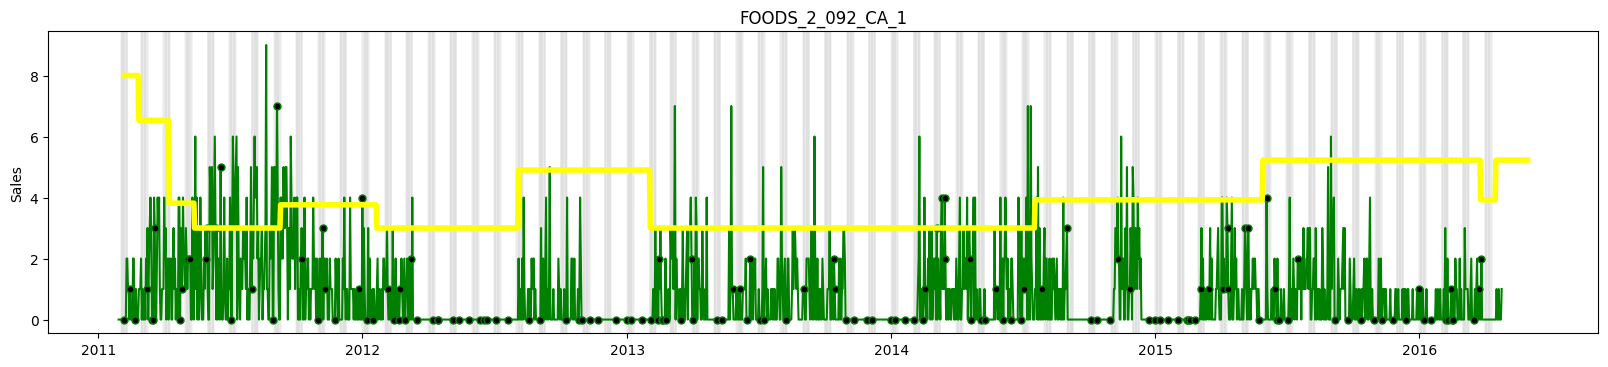

In [71]:
v = event_dates['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = CA_snap[:-20]
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
z = sell_prices[(sell_prices['store_id']=='CA_1') & (sell_prices['item_id']=='FOODS_2_092')]
z=calendar[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (8-3)) / (z.sell_price.max() - z.sell_price.min())) + 3)
z = z.iloc[:-20,:]
z = z.set_index('date')


plt.figure(None, figsize=(20, 4), dpi=100, facecolor='white')
for i in range(len(c)):
    plt.axvline(c[i],color='dimgray',linewidth=0.1)
plt.plot(x.iloc[0,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
plt.plot(z.sell_price,color='yellow',linewidth=4)
plt.title("FOODS_2_092_CA_1")
plt.ylabel("Sales")
plt.show()

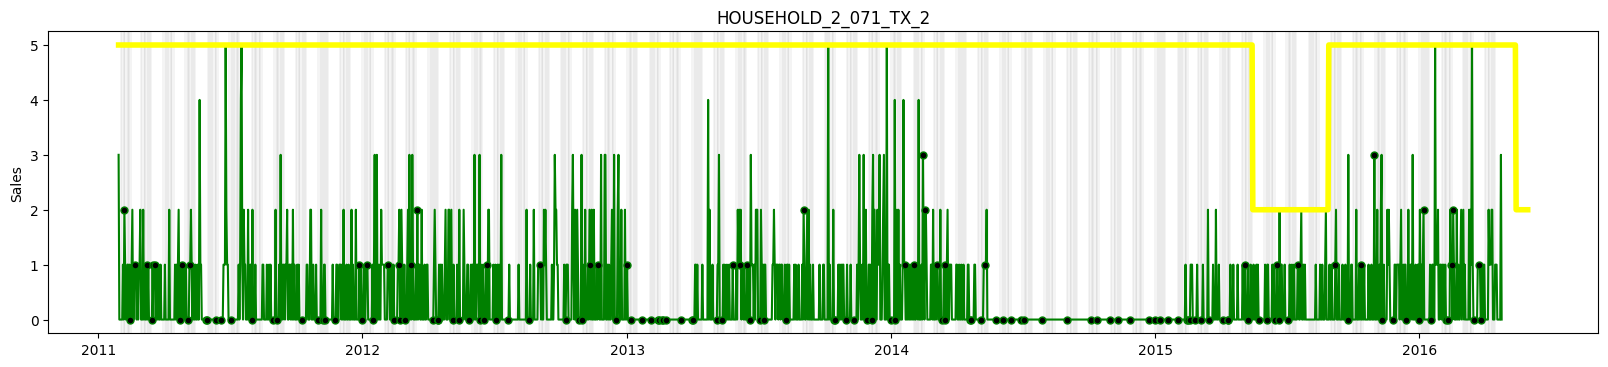

In [72]:
v = event_dates['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = TX_snap[:-20]
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
z = sell_prices[(sell_prices['store_id']=='TX_2') & (sell_prices['item_id']=='HOUSEHOLD_2_071')]
z=calendar[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (5-2)) / (z.sell_price.max() - z.sell_price.min())) + 2)
z = z.iloc[:-20,:]
z = z.set_index('date')


plt.figure(None, figsize=(20, 4), dpi=100, facecolor='white')
for i in range(len(c)):
    plt.axvline(c[i],color='dimgray',linewidth=0.1)
plt.plot(x.iloc[1,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
plt.plot(z.sell_price,color='yellow',linewidth=4)
plt.title("HOUSEHOLD_2_071_TX_2")
plt.ylabel("Sales")
plt.show()

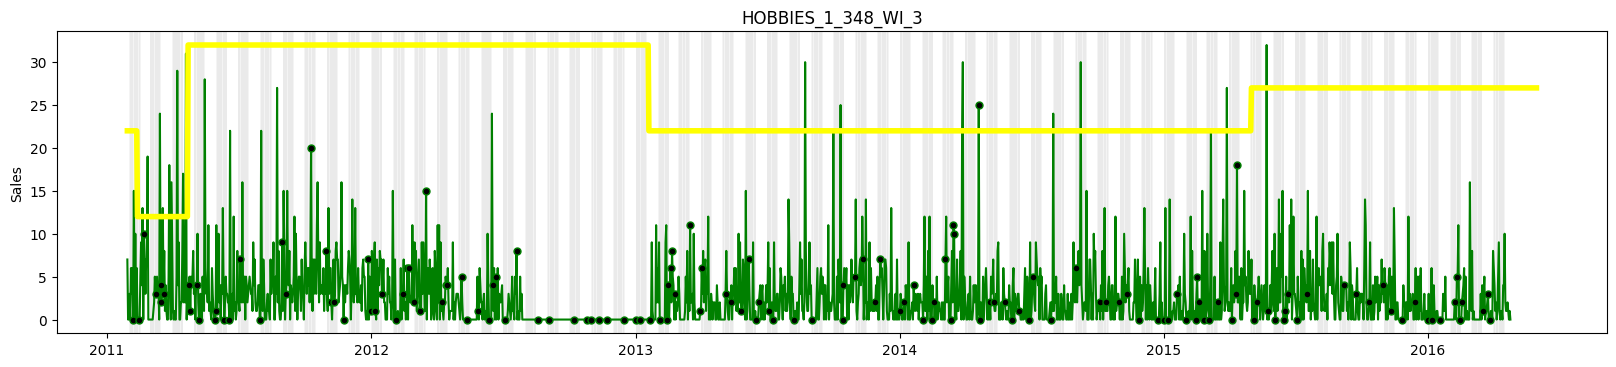

In [73]:
v = event_dates['date']
d = []
for i in range(len(v)):
    d.append(x.columns.get_loc(v.values[i]))   
c = WI_snap[:-20]
e = []
for i in range(len(c)):
    e.append(x.columns.get_loc(c[i]))
    
z = sell_prices[(sell_prices['store_id']=='WI_3') & (sell_prices['item_id']=='HOBBIES_1_348')]
z=calendar[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (32-12)) / (z.sell_price.max() - z.sell_price.min())) + 12)
z = z.iloc[:-20,:]
z = z.set_index('date')


plt.figure(None, figsize=(20, 4), dpi=100, facecolor='white')
for i in range(len(c)):
    plt.axvline(c[i],color='dimgray',linewidth=0.1)
plt.plot(x.iloc[2,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
plt.plot(z.sell_price,color='yellow',linewidth=4)
plt.title("HOBBIES_1_348_WI_3")
plt.ylabel("Sales")
plt.show()